In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as sts

In [394]:
file_path=os.path.join('BankChurners.csv')
df=pd.read_csv(file_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [395]:
drop_columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df['Total_Relationship_Cnt']=df['Total_Relationship_Count'].map(lambda x: 'More than 3' if x>3 else ('3' if x==3 else '2 or less'))
# df['Monthly_Trans_Ct']=df.apply(lambda x: x['Total_Trans_Ct']/12 if x['Months_on_book']>=12 else x['Total_Trans_Ct']/x['Months_on_book'], axis=1)#.round()
df['Total_Ct_Chng_Q4_Q1_bin']=pd.cut(df['Total_Ct_Chng_Q4_Q1'], bins=10)
income_map={
    'Unknown': '6. Unknown', 
    'Less than $40K': '5. Less than $40K', 
    '$40K - $60K': '4. $40K - $60K',
    '$60K - $80K': '3. $60K - $80K', 
    '$80K - $120K': '2. $80K - $120K',
    '$120K +': '1. $120K +'}
df['Income_Category']=df['Income_Category'].map(income_map)
df['Customer_Age_bin']=pd.cut(df['Customer_Age'], bins=[df['Customer_Age'].min() + i*6 for i in range(9)], include_lowest=True)
df['Months_on_book_bin']=pd.cut(df['Months_on_book'], bins=10)
df=df.drop(drop_columns, axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Cnt,Total_Ct_Chng_Q4_Q1_bin,Customer_Age_bin,Months_on_book_bin
0,768805383,Existing Customer,45,M,3,High School,Married,3. $60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,More than 3,"(1.486, 1.857]","(44.0, 50.0]","(38.8, 43.1]"
1,818770008,Existing Customer,49,F,5,Graduate,Single,5. Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,More than 3,"(3.343, 3.714]","(44.0, 50.0]","(43.1, 47.4]"
2,713982108,Existing Customer,51,M,3,Graduate,Married,2. $80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,More than 3,"(2.228, 2.6]","(50.0, 56.0]","(34.5, 38.8]"
3,769911858,Existing Customer,40,F,4,High School,Unknown,5. Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,3,"(2.228, 2.6]","(38.0, 44.0]","(30.2, 34.5]"
4,709106358,Existing Customer,40,M,3,Uneducated,Married,3. $60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,More than 3,"(2.228, 2.6]","(38.0, 44.0]","(17.3, 21.6]"


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  object  
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [397]:
len(df)

10127

# Heatmap

In [423]:

df[['Customer_Age_bin', 'Gender']].pivot_table(index='Customer_Age_bin', columns='Gender', aggfunc='size').style.background_gradient()

Gender,F,M
Customer_Age_bin,,
"(25.999, 32.0]",216,246
"(32.0, 38.0]",653,588
"(38.0, 44.0]",1307,1165
"(44.0, 50.0]",1523,1351
"(50.0, 56.0]",1092,917
"(56.0, 62.0]",457,393
"(62.0, 68.0]",110,107
"(68.0, 74.0]",0,2


In [434]:
education_map=[
    'Unknown', 
    'Uneducated',
    'High School', 
    'College', 
    'Graduate', 
    'Post-Graduate', 
    'Doctorate']

df[['Customer_Age_bin', 'Education_Level']].pivot_table(index='Customer_Age_bin', columns='Education_Level', aggfunc='size')[education_map].iloc[:, 1:]#/len(df)#.style.background_gradient()

Education_Level,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Customer_Age_bin,,,,,,
"(25.999, 32.0]",58,96,53,138,41,1
"(32.0, 38.0]",185,265,130,382,59,57
"(38.0, 44.0]",366,481,251,784,118,98
"(44.0, 50.0]",433,540,268,866,161,152
"(50.0, 56.0]",278,402,224,628,91,93
"(56.0, 62.0]",140,181,67,256,44,39
"(62.0, 68.0]",27,46,20,74,2,11
"(68.0, 74.0]",0,2,0,0,0,0


In [417]:
pd.DataFrame(df['Customer_Age_bin'].value_counts().sort_index())

,Customer_Age_bin
"(25.999, 32.0]",462
"(32.0, 38.0]",1241
"(38.0, 44.0]",2472
"(44.0, 50.0]",2874
"(50.0, 56.0]",2009
"(56.0, 62.0]",850
"(62.0, 68.0]",217
"(68.0, 74.0]",2


In [422]:
income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
(df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols))#.applymap(lambda x: '{:,.2f}%'.format(x*100))#.style.background_gradient()

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",9,25,50,94,211,73
"(32.0, 38.0]",75,191,177,232,432,134
"(38.0, 44.0]",150,391,387,450,854,240
"(44.0, 50.0]",204,459,423,502,957,329
"(50.0, 56.0]",235,362,233,285,688,206
"(56.0, 62.0]",54,102,117,177,307,93
"(62.0, 68.0]",0,5,15,49,111,37
"(68.0, 74.0]",0,0,0,1,1,0


In [454]:
income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
# display(income_cols)
attrited_df=df[df['Attrition_Flag']=='Attrited Customer']
summary_df=attrited_df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols)#.applymap(lambda x: '{:,.2f}%'.format(x*100))
summary_df.style.background_gradient()
# summary_df

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",3,1,8,10,33,7
"(32.0, 38.0]",13,21,17,30,68,19
"(38.0, 44.0]",23,60,63,84,155,34
"(44.0, 50.0]",37,85,49,76,163,62
"(50.0, 56.0]",36,56,28,44,132,42
"(56.0, 62.0]",14,19,20,26,47,18
"(62.0, 68.0]",0,0,4,1,14,5
"(68.0, 74.0]",0,0,0,0,0,0


In [406]:

income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
# display(income_cols)
existing_df=df[df['Attrition_Flag']=='Existing Customer']
existing_df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols).style.background_gradient()

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",6,24,42,84,178,66
"(32.0, 38.0]",62,170,160,202,364,115
"(38.0, 44.0]",127,331,324,366,699,206
"(44.0, 50.0]",167,374,374,426,794,267
"(50.0, 56.0]",199,306,205,241,556,164
"(56.0, 62.0]",40,83,97,151,260,75
"(62.0, 68.0]",0,5,11,48,97,32
"(68.0, 74.0]",0,0,0,1,1,0


In [402]:
def contingency_table(data, outer_col, inner_col): 
    return data[[outer_col, inner_col]].pivot_table(columns=outer_col, index=inner_col, aggfunc='size').fillna(0).apply(lambda x: x/x.sum(), axis=0).applymap(lambda x: '{:,.2f}%'.format(x*100))

In [287]:
contingency_table(df, 'Attrition_Flag', 'Income_Category')

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
1. $120K +,0.077443,0.070706
2. $80K - $120K,0.148740,0.152118
3. $60K - $80K,0.116165,0.142706
4. $40K - $60K,0.166564,0.178706
5. Less than $40K,0.376152,0.346941
6. Unknown,0.114935,0.108824


In [289]:
heat_map=contingency_table(df, 'Income_Category', 'Customer_Age_bin')
heat_map.style.background_gradient()

Income_Category,1. $120K +,2. $80K - $120K,3. $60K - $80K,4. $40K - $60K,5. Less than $40K,6. Unknown
Customer_Age_bin,,,,,,
"(25.953, 30.7]",0.006878,0.005863,0.019971,0.027374,0.035664,0.042266
"(30.7, 35.4]",0.042641,0.052769,0.059201,0.073184,0.068520,0.075540
"(35.4, 40.1]",0.123796,0.156352,0.154066,0.154749,0.143218,0.130396
"(40.1, 44.8]",0.148556,0.180456,0.204708,0.178212,0.172985,0.153777
"(44.8, 49.5]",0.195323,0.252117,0.263195,0.246927,0.226903,0.246403
"(49.5, 54.2]",0.324622,0.226059,0.151926,0.150279,0.183095,0.182554
"(54.2, 58.9]",0.143054,0.101629,0.083452,0.075978,0.089301,0.080935
"(58.9, 63.6]",0.015131,0.024756,0.063481,0.073743,0.055041,0.062050
"(63.6, 68.3]",0.000000,0.000000,0.000000,0.018994,0.024993,0.026079


In [8]:
df[['Income_Category', 'Attrition_Flag']].pivot_table(columns='Attrition_Flag', index='Income_Category', aggfunc='size').fillna(0)#.apply(lambda x: x/x.sum(), axis=0).applymap(lambda x: '{:,.2f}%'.format(x*100))
# pd.DataFrame(df['Income_Category'].value_counts())#pivot_table(index='Income_Category', aggfunc='size').fillna(0)#.apply(lambda x: x/x.sum(), axis=0).applymap(lambda x: '{:,.2f}%'.format(x*100))

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


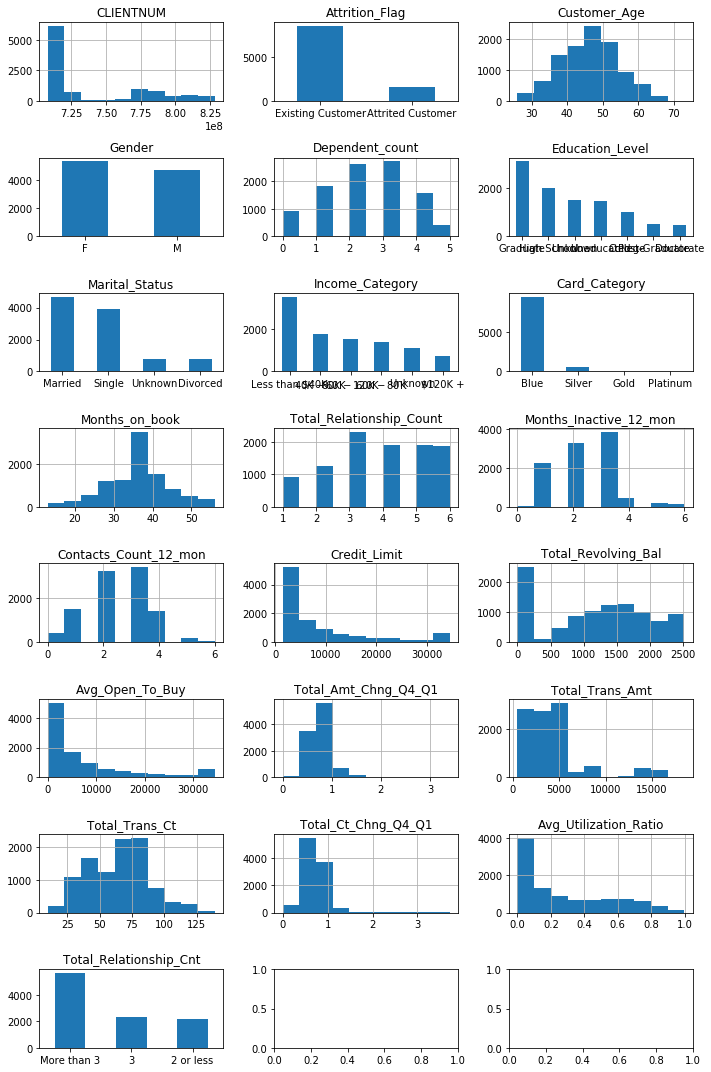

In [9]:
feature_list=list(df.columns)
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(feature_list)/ncolumns), ncolumns, figsize=(10, 15))
for idx, each_feature in enumerate(feature_list): 
    if df[each_feature].dtype.kind in 'biufc': 
        df[each_feature].hist(ax=ax[math.floor(idx/ncolumns)][idx%ncolumns])
        ax[math.floor(idx/ncolumns)][idx%ncolumns].set_title(each_feature)
    else: 
        df[each_feature].value_counts().plot(kind='bar', ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], rot=0)
        ax[math.floor(idx/ncolumns)][idx%ncolumns].set_title(each_feature)
plt.tight_layout()

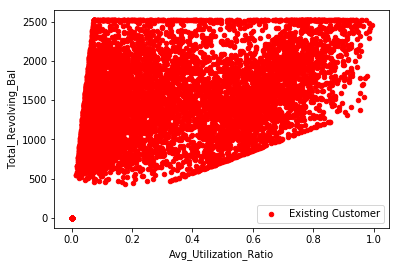

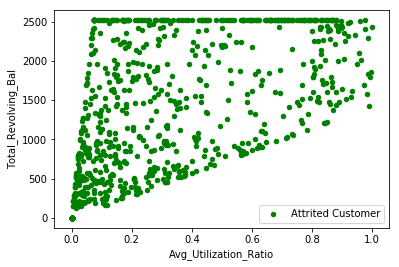

In [10]:
colors=['red', 'green']
for idx, each_flag in enumerate(df['Attrition_Flag'].unique()): 
    data=df[df['Attrition_Flag']==each_flag]
    data[['Avg_Utilization_Ratio', 'Attrition_Flag', 'Total_Revolving_Bal']].plot(kind='scatter', x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', label=each_flag, c=colors[idx])

In [11]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

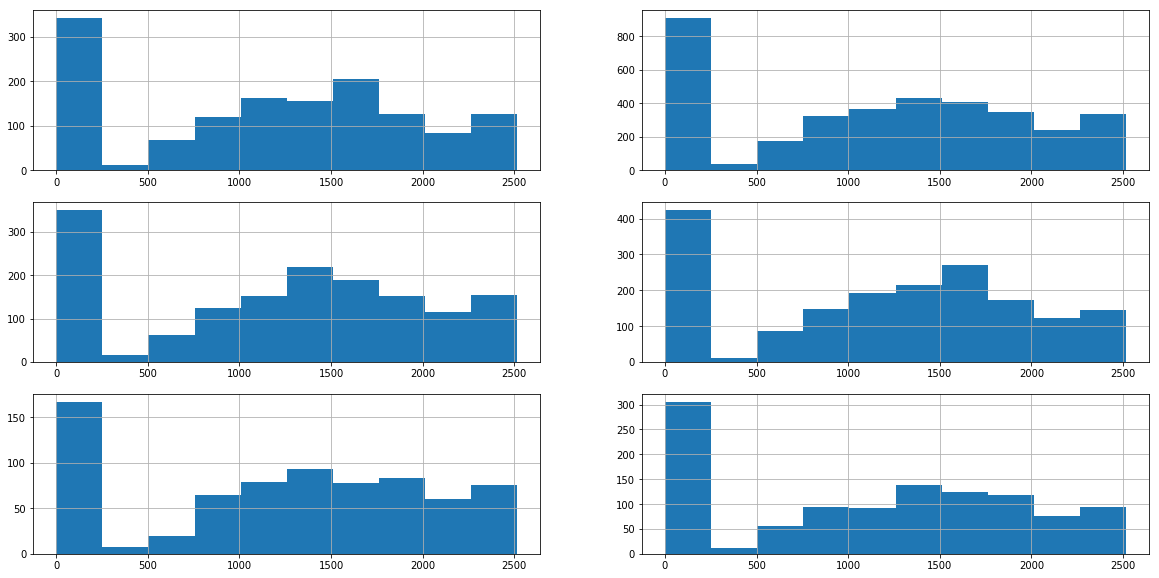

In [12]:
ncat=df['Income_Category'].nunique()
ncolumns=2
fig, ax=plt.subplots(math.ceil(ncat/ncolumns), ncolumns, figsize=(20, 10))
for idx, each_cat in enumerate(df['Income_Category'].unique()): 
    df[df['Income_Category']==each_cat]['Total_Revolving_Bal'].hist(ax=ax[math.floor(idx/ncolumns)][idx%ncolumns])

# Pie Charts

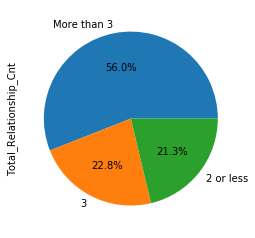

In [13]:
df['Total_Relationship_Cnt'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [14]:
np.arange(4)*2

array([0, 2, 4, 6])

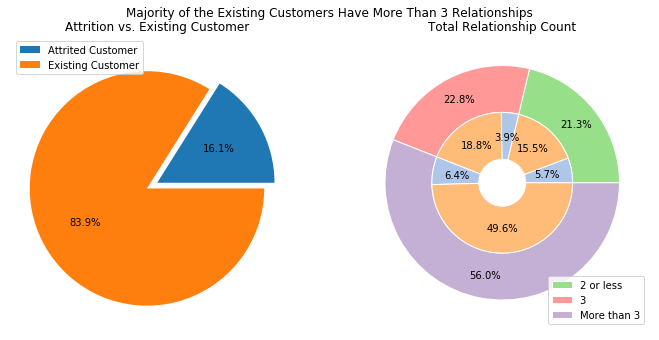

In [15]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
size=.4
cmap = plt.get_cmap("tab20")

vals=df.pivot_table(columns='Total_Relationship_Cnt', index='Attrition_Flag', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.arange(2)*2)
outer_labels=vals.index
ax[0].pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', explode=[0, 0.1])
ax[0].legend(outer_labels, loc='upper left')
ax[0].set_title('Attrition vs. Existing Customer')
vals=df.pivot_table(columns='Attrition_Flag', index='Total_Relationship_Cnt', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.array([5, 7, 9]))
inner_colors = cmap(np.array([1, 3, 1, 3, 1, 3]))
outer_labels=vals.index
handles, texts, annots=ax[1].pie(vals.sum(axis=1), radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8)
ax[1].pie(vals.values.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=.65)
ax[1].set_title('Total Relationship Count')
ax[1].legend(handles, outer_labels, loc='lower right')
fig.suptitle('Majority of the Existing Customers Have More Than 3 Relationships')
plt.tight_layout(pad=3)
plt.show()

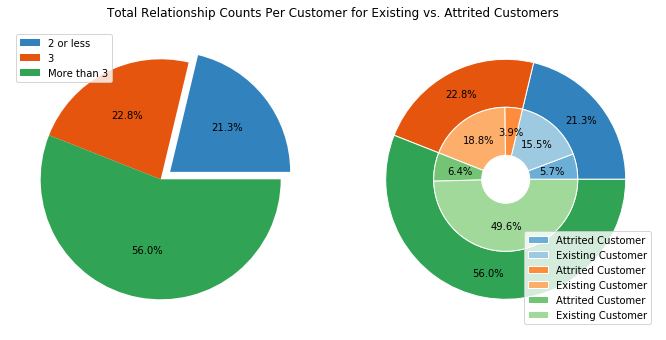

In [16]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
size=.4
cmap = plt.get_cmap("tab20c")

vals=df.pivot_table(columns='Attrition_Flag', index='Total_Relationship_Cnt', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
outer_labels=vals.index
inner_labels=list(vals.columns)*3
ax[0].pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', explode=[0.1, 0, 0])
ax[0].legend(outer_labels, loc='upper left')

ax[1].pie(vals.sum(axis=1), radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8)
handles, texts, annots=ax[1].pie(vals.values.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=.65)
ax[1].legend(handles, inner_labels, loc='lower right')
fig.suptitle('Total Relationship Counts Per Customer for Existing vs. Attrited Customers')
plt.tight_layout(pad=3)
plt.show()

In [17]:
def plot_nested_pie(data, outer_col, inner_col): 
    size=.4
    wedgeprops={'width': size, 'edgecolor':'w'}
    plot_df=data.pivot_table(columns=inner_col, index=outer_col, aggfunc='size')
    plt.pie(plot_df.sum(axis=1).values, radius=1,
           wedgeprops=wedgeprops, autopct='%1.1f%%', pctdistance=0.8)
    plt.pie(plot_df.values.flatten(), radius=1-size,
           wedgeprops=wedgeprops, autopct='%1.1f%%', pctdistance=.65)
    labels=list(plot_df.index)+[(idx, col) for idx in plot_df.index for col in plot_df.columns]
    plt.legend(labels, bbox_to_anchor=(1, 1))
    plt.title(outer_col)

In [18]:
inner_col='Attrition_Flag'
outer_col='Total_Relationship_Cnt'
plot_df=df.pivot_table(columns=inner_col, index=outer_col, aggfunc='size')
np.arange(len(plot_df.values.flatten())+len(plot_df.index))[len(plot_df.index):]
list(plot_df.index)+[(idx, col) for idx in plot_df.index for col in plot_df.columns]

['2 or less',
 '3',
 'More than 3',
 ('2 or less', 'Attrited Customer'),
 ('2 or less', 'Existing Customer'),
 ('3', 'Attrited Customer'),
 ('3', 'Existing Customer'),
 ('More than 3', 'Attrited Customer'),
 ('More than 3', 'Existing Customer')]

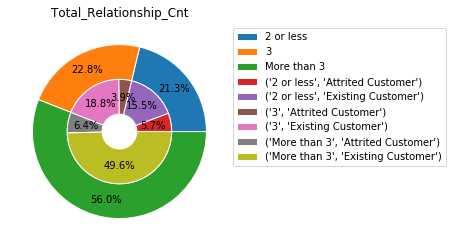

In [20]:
plot_nested_pie(df, 'Total_Relationship_Cnt', 'Attrition_Flag')

# Bar Graphs

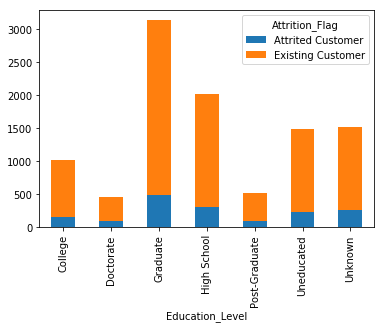

In [21]:
education_level=df[['Attrition_Flag', 'Education_Level']].groupby(['Education_Level', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)
# education_level.groupby(['Education_Level']).apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar', stacked=True)
# education_level/education_level.groupby(['Attrition_Flag']).sum().plot(kind='bar')

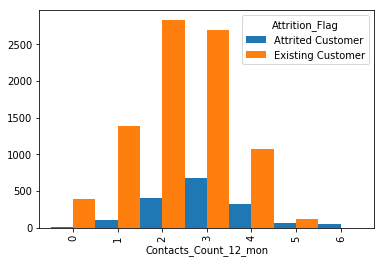

In [22]:
df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size').plot(kind='bar', width=1)

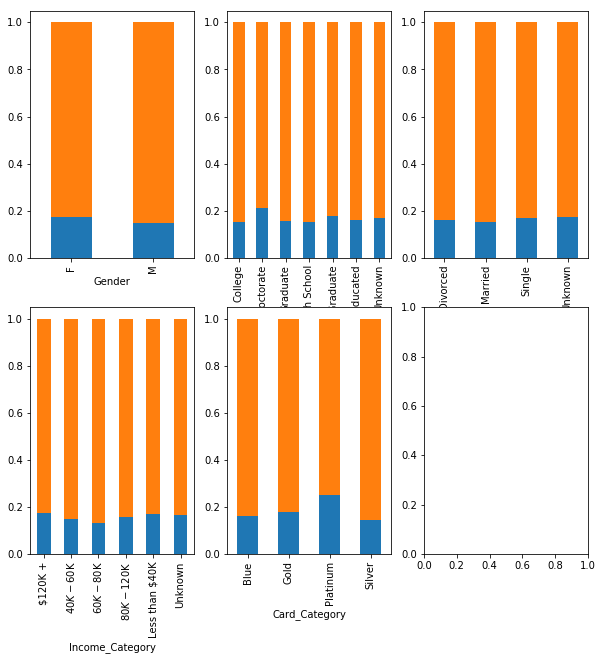

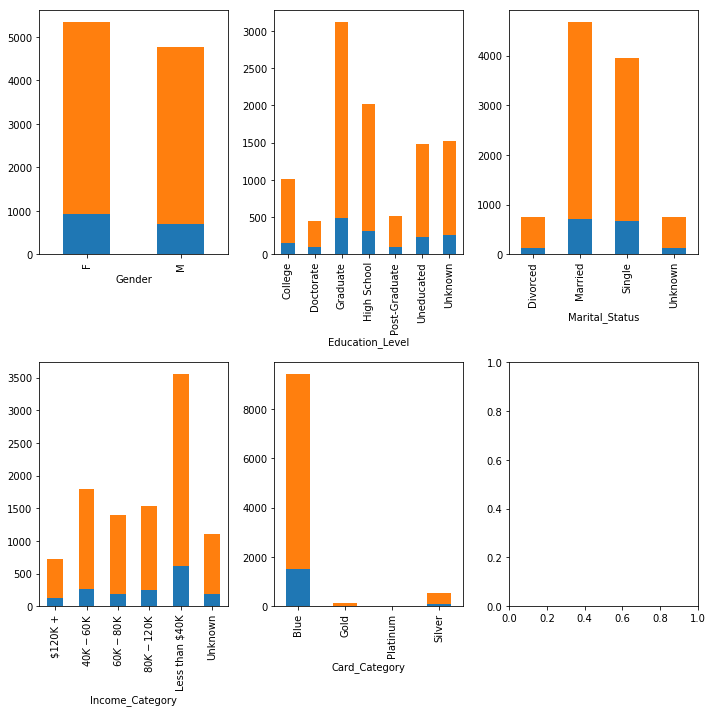

In [23]:
cat_list=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(cat_list)/ncolumns), ncolumns, figsize=(10, 10))
for idx, each_feature in enumerate(cat_list): 
#     df[['Attrition_Flag', 'Gender']].pivot_table(columns='Attrition_Flag', index='Gender', aggfunc='size').plot(kind='bar', stacked=True)
    df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
fig, ax=plt.subplots(math.ceil(len(cat_list)/ncolumns), ncolumns, figsize=(10, 10))
for idx, each_feature in enumerate(cat_list): 
    df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
#     df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
plt.tight_layout()

In [24]:
def plot_stacked_bar_pct(data, outer_col, inner_col): 
    # Plots a percent stacked bar chart of counts of observations based on two categorical columns
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    plot_df=data[[inner_col, outer_col]].pivot_table(columns=inner_col, index=outer_col, aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
    bottom=np.zeros(len(plot_df.index))
    for each_cat in plot_df.columns: 
        plt.bar(plot_df.index, plot_df[each_cat].values, bottom=bottom, label=each_cat)
        bottom+=plot_df[each_cat].values
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Relative Frequency')

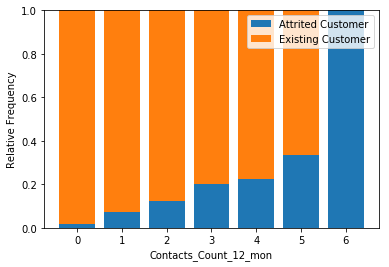

In [25]:
plot_stacked_bar_pct(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

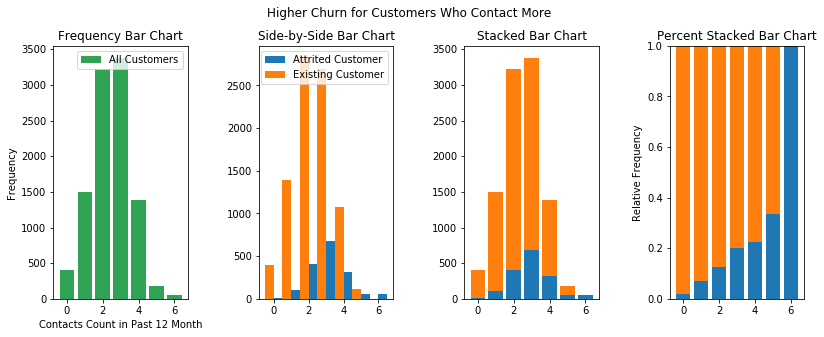

In [26]:
fig, ax=plt.subplots(1, 4, figsize=(12, 5))
cmap = plt.get_cmap("tab20c")

data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
ax[0].bar(data.index, data.sum(axis=1), color=cmap(8), label='All Customers')
ax[0].set_title('Frequency Bar Chart')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Contacts Count in Past 12 Month')
ax[0].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
width=.5
for idx, each_cat in enumerate(data.columns): 
    ax[1].bar(data.index-(idx*width), data[each_cat].values, width=width, label=each_cat, align='edge')
ax[1].set_title('Side-by-Side Bar Chart')
ax[1].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
bottom=np.zeros(len(data.index))
for each_cat in data.columns: 
    ax[2].bar(data.index, data[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=data[each_cat].values
ax[2].set_title('Stacked Bar Chart')
ary=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
bottom=np.zeros(len(ary.index))
for each_cat in ary.columns: 
    ax[3].bar(ary.index, ary[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=ary[each_cat].values
ax[3].set_ylabel('Relative Frequency')
ax[3].set_title('Percent Stacked Bar Chart')
fig.suptitle('Higher Churn for Customers Who Contact More')
plt.tight_layout(pad=3)
plt.show()

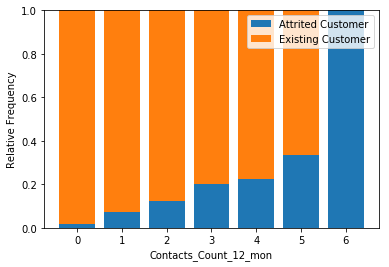

In [27]:
plot_stacked_bar_pct(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

# Histogram

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


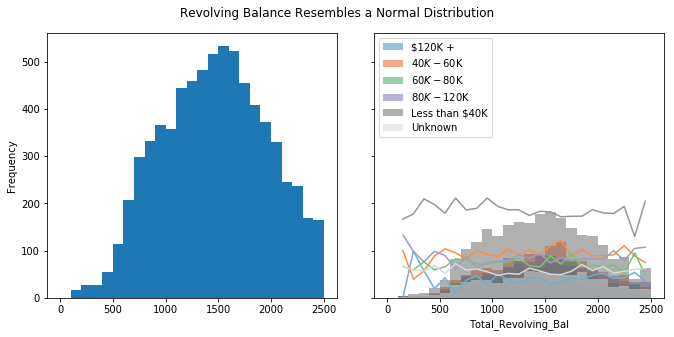

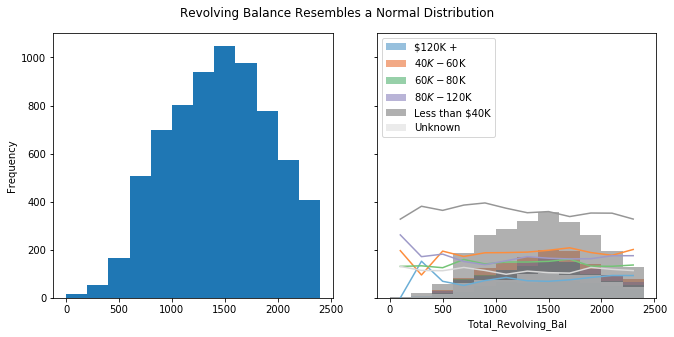

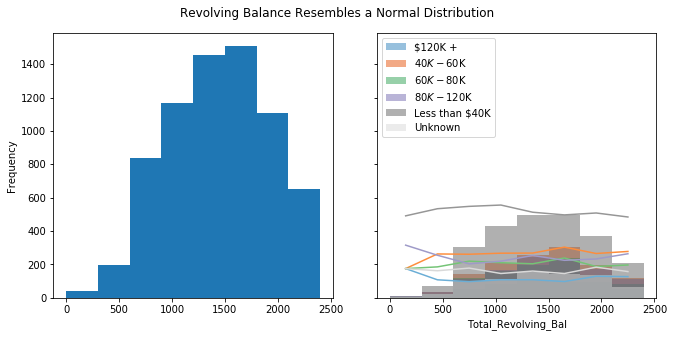

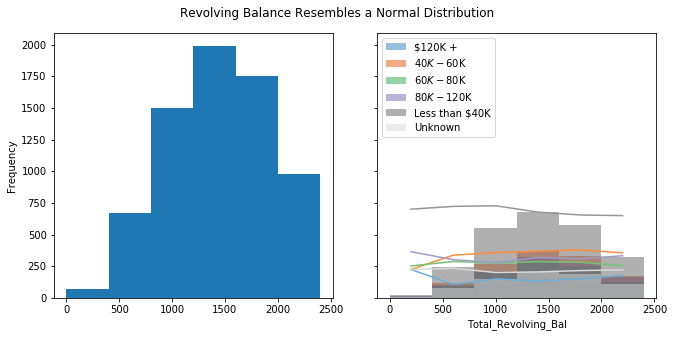

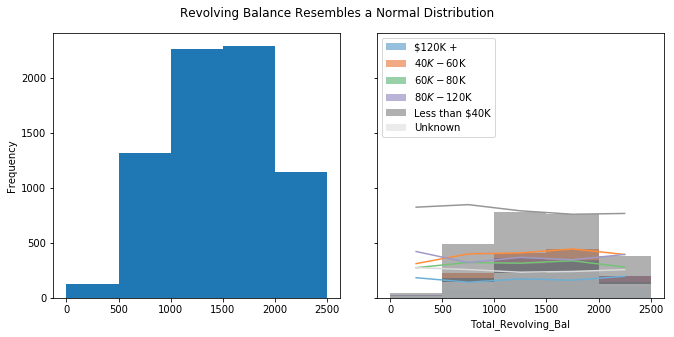

In [28]:
for i, binwidth in enumerate([100, 200, 300, 400, 500]):
    total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
    cmap = plt.get_cmap("tab20c")
    min_bal=df['Total_Revolving_Bal'].min()
    max_bal=df['Total_Revolving_Bal'].max()
    bar_color=cmap(np.arange(6)*4)
    line_color=cmap(np.arange(6)*4+1)
#     bins=np.arange(min_bal, max_bal, 200)
    bins=np.arange(min_bal, max_bal, binwidth)
    fig, ax=plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
    # colors=['cornflowerblue', 'darkorange']
    total_rev_bal['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins)
    total_count, total_division=np.histogram(total_rev_bal['Total_Revolving_Bal'], bins=bins)
    for idx, (i, g) in enumerate(total_rev_bal.groupby('Income_Category')): 
        ax[1].hist(g['Total_Revolving_Bal'].values, alpha=.5, label=i, bins=bins, color=bar_color[idx]) 
        count, division=np.histogram(g['Total_Revolving_Bal'], bins=bins)
        ax[1].plot((division[:-1]+division[1:])/2, count/total_count*np.max(total_count), color=line_color[idx])
    ax[1].set_xlabel('Total_Revolving_Bal')
    ax[1].legend(loc='upper left')
    fig.suptitle('Revolving Balance Resembles a Normal Distribution')
    fig.tight_layout(pad=3)

In [29]:
def experiment_hist_bins(data, outer_col, inner_col, binwidth_candidates): 
    min_amt=data[outer_col].min()
    max_amt=data[outer_col].max()
    ncolumns=3
    fig, ax=plt.subplots(math.ceil(len(binwidth_candidates)/ncolumns), ncolumns, figsize=(10, 5))
    for i, bin_width in enumerate(binwidth_candidates):
        first_bin=min_amt//bin_width*bin_width
        bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
#         bins=np.arange(math.floor(min_amt/bin_width)*bin_width, math.ceil(max_amt/bin_width)*bin_width+1, bin_width)
        if i%ncolumns==0: 
            ax[math.floor(i/ncolumns)][0].set_ylabel('Frequency')
            ax[math.floor(i/ncolumns)][0].set_xlabel(outer_col)
        for idx, (g_name, g) in enumerate(data.groupby(inner_col)): 
            ax[math.floor(i/ncolumns)][i%ncolumns].hist(g[outer_col].values, alpha=.5, label=g_name, bins=bins, stacked=True)
        ax[math.floor(i/ncolumns)][i%ncolumns].set_title(f'Binwidth: {bin_width}')
    fig.tight_layout(pad=3)

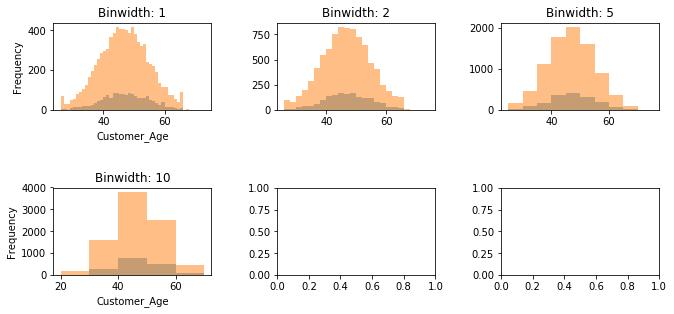

In [30]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# experiment_hist_bins(df, 'Customer_Age', 'Attrition_Flag', [50, 100, 200, 300, 400, 500])
experiment_hist_bins(df, 'Customer_Age', 'Attrition_Flag', [1, 2, 5, 10])

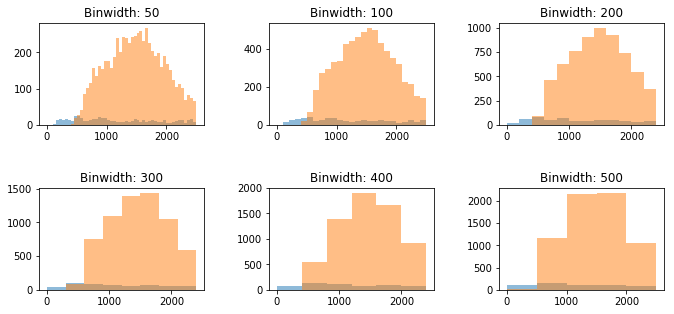

In [31]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
binwidth_candidates=[50, 100, 200, 300, 400, 500]
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(binwidth_candidates)/ncolumns), ncolumns, figsize=(10, 5))
for i, bin_width in enumerate(binwidth_candidates):
    bins=np.arange(min_bal, max_bal, bin_width)
    for idx, (g_name, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
        ax[math.floor(i/ncolumns)][i%ncolumns].hist(g['Total_Revolving_Bal'].values, alpha=.5, label=g_name, bins=bins)
    ax[math.floor(i/ncolumns)][i%ncolumns].set_title(f'Binwidth: {bin_width}')
    fig.tight_layout(pad=3)

In [32]:
def plot_overlap_hist(data, outer_col, inner_col, bin_width): 
    min_amt=data[outer_col].min()
    max_amt=data[outer_col].max()
    first_bin=min_amt//bin_width*bin_width
    bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
#     bins=np.arange(min_amt, max_amt, bin_width)
    for idx, (g_name, g) in enumerate(data.groupby(inner_col)): 
        plt.hist(g[outer_col].values, alpha=.5, label=g_name, bins=bins)
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Frequency')

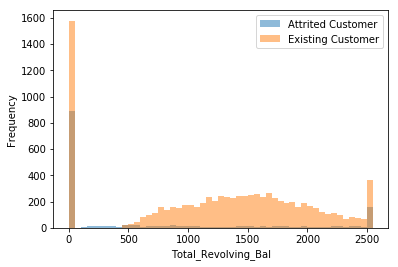

In [33]:
plot_overlap_hist(df, 'Total_Revolving_Bal', 'Attrition_Flag', 50)

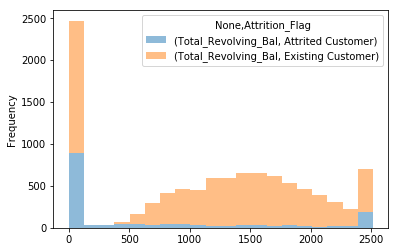

In [34]:
df[['Total_Revolving_Bal', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='hist', stacked=True, alpha=0.5, bins=20)

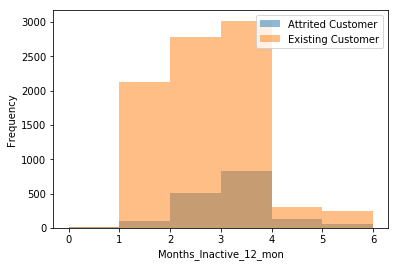

In [35]:
plot_overlap_hist(df, 'Months_Inactive_12_mon', 'Attrition_Flag', 1)

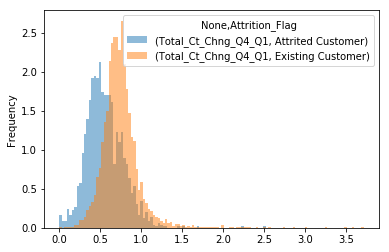

In [248]:
bin_width=0.03
min_amt=df['Total_Ct_Chng_Q4_Q1'].min()
max_amt=df['Total_Ct_Chng_Q4_Q1'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
df[['Attrition_Flag', 'Total_Ct_Chng_Q4_Q1']].pivot(columns='Attrition_Flag').plot(kind='hist', alpha=.5, bins=bins, density=True)
# plt.legend(['Attrited Customer', 'Existing Customer'])

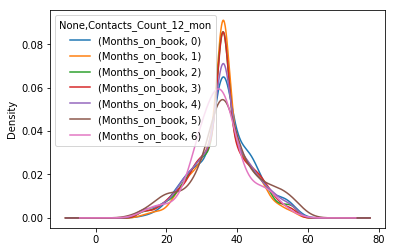

In [37]:
bin_width=1
min_amt=df['Months_on_book'].min()
max_amt=df['Months_on_book'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
df[['Contacts_Count_12_mon', 'Months_on_book']].pivot(columns='Contacts_Count_12_mon').plot(kind='kde')
# plt.legend(['Attrited Customer', 'Existing Customer'])

In [38]:
bin_width=100
min_amt=data['Total_Revolving_Bal'].min()
max_amt=data['Total_Revolving_Bal'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
df[['Attrition_Flag', 'Total_Revolving_Bal']].pivot(columns='Attrition_Flag').plot(kind='hist', stacked=True, bins=bins)
plt.legend(['Attrited Customer', 'Existing Customer'])

KeyError: 'Total_Revolving_Bal'

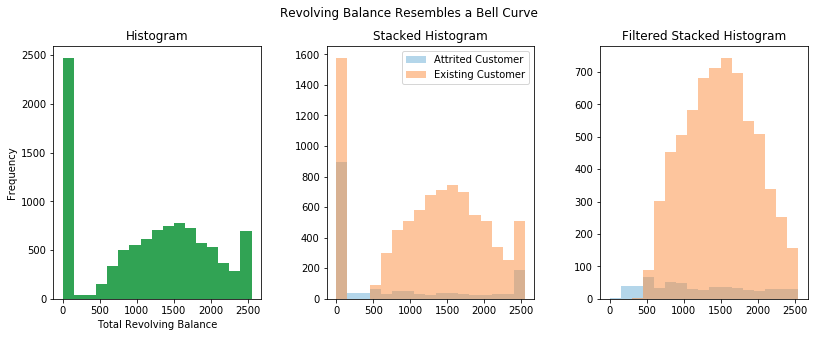

In [243]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
bins=np.arange(math.floor(min_bal/150)*150, math.ceil(max_bal/150)*150+1, 150)
fig, ax=plt.subplots(1, 3, figsize=(12, 5), sharex=True)
colors=['cornflowerblue', 'darkorange']
cmap = plt.get_cmap("tab20c")
colors=[cmap(1), cmap(5)]
# for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
#     g['Total_Revolving_Bal'].plot(kind='hist', label=i, density=True, alpha=0.5, ax=ax[1])
#     # total_rev_bal.plot(kind='hist')
#     min_bal=g['Total_Revolving_Bal'].min()
#     max_bal=g['Total_Revolving_Bal'].max()
#     norm_x=np.arange(min_bal, max_bal, len(total_rev_bal)**.1)
#     ax[1].plot(norm_x, sts.norm.pdf(norm_x, loc=g['Total_Revolving_Bal'].mean(), scale=g['Total_Revolving_Bal'].std()), color=colors[idx])
# total_rev_bal['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins, color=cmap(8))
df['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins, color=cmap(8))
ax[0].set_xlabel('Total Revolving Balance')
ax[0].set_title('Histogram')
# for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
for idx, (i, g) in enumerate(df.groupby('Attrition_Flag')): 
#     print(np.histogram(g['Total_Revolving_Bal'].values, bins=bins))
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[1], bins=bins, color=colors[idx]) 
ax[1].set_ylabel('')
ax[1].legend(loc='upper right')
ax[1].set_title('Stacked Histogram')
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
bin_width=150
min_amt=df['Total_Revolving_Bal'].min()
max_amt=df['Total_Revolving_Bal'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
#     print(np.histogram(g['Total_Revolving_Bal'].values, bins=bins))
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[2], bins=bins, color=colors[idx]) 

ax[2].set_title('Filtered Stacked Histogram')
ax[2].set_ylabel('')
fig.suptitle('Revolving Balance Resembles a Bell Curve')
fig.tight_layout(pad=3)

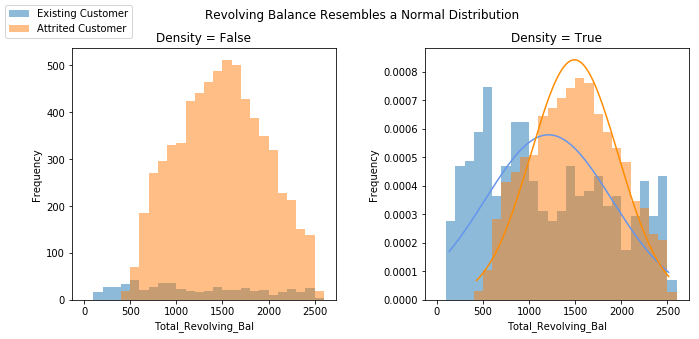

In [238]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
bins=np.arange(math.floor(min_bal/100)*100, math.ceil(max_bal/100)*100+1, 100)
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
colors=['cornflowerblue', 'darkorange']


for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
    g['Total_Revolving_Bal'].plot(kind='hist', label=i, density=True, alpha=0.5, ax=ax[1], bins=bins)
    # total_rev_bal.plot(kind='hist')
    min_bal=g['Total_Revolving_Bal'].min()
    max_bal=g['Total_Revolving_Bal'].max()
    norm_x=np.arange(min_bal, max_bal, len(total_rev_bal)**.1)
    ax[1].plot(norm_x, sts.norm.pdf(norm_x, loc=g['Total_Revolving_Bal'].mean(), scale=g['Total_Revolving_Bal'].std()), color=colors[idx])

for i, g in total_rev_bal.groupby('Attrition_Flag'): 
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[0], bins=bins) 

ax[0].set_title('Density = False')
ax[1].set_title('Density = True')
ax[0].set_xlabel('Total_Revolving_Bal')
ax[1].set_xlabel('Total_Revolving_Bal')
fig.legend(['Existing Customer', 'Attrited Customer'], loc='upper left')
fig.suptitle('Revolving Balance Resembles a Normal Distribution')
fig.tight_layout(pad=3)

# Density Plot

In [ ]:
from scipy.stats import gaussian_kde

kde=gaussian_kde(df['Total_Trans_Ct'].values)
x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
plt.plot(x_axis, kde(x_axis))
# df['Total_Trans_Ct'].plot(kind='kde')

In [ ]:
cmap=plt.get_cmap('tab20c')
fig, ax=plt.subplots(1, 2, sharey=True, figsize=(10, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
fig.suptitle('Total Transaction Count Resemsbles a Bimodal Distribution')
total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[1])
ax[1].legend(['Attrited Customer', 'Existing Customer'])
plt.tight_layout(pad=3)
plt.show()


In [ ]:
cmap=plt.get_cmap('tab20c')
fig, ax=plt.subplots(1, 4, figsize=(15, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
ax[0].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[0].set_ylim(bottom=0)
total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[1])
ax[1].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('')
ax[1].legend(['Attrited Customer', 'Existing Customer'])

df['Total_Trans_Amt'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[2], rot=15)
df['Total_Trans_Amt'].plot(kind='kde', color=cmap(8), ax=ax[2], rot=15)
ax[2].set_xlabel('Total_Trans_Amt')
ax[2].set_xlim([df['Total_Trans_Amt'].min(), df['Total_Trans_Amt'].max()])
ax[2].set_ylim(bottom=0)
ax[2].set_ylabel('')
total_rev_bal[['Total_Trans_Amt', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[3], rot=15)
ax[3].set_xlim([df['Total_Trans_Amt'].min(), df['Total_Trans_Amt'].max()])
ax[3].set_ylim(bottom=0)
ax[3].set_ylabel('')
ax[3].legend().remove()

fig.suptitle('Total Transaction Count and Amount Resemsble a Bimodal Distribution')
plt.tight_layout(pad=3)
plt.show()


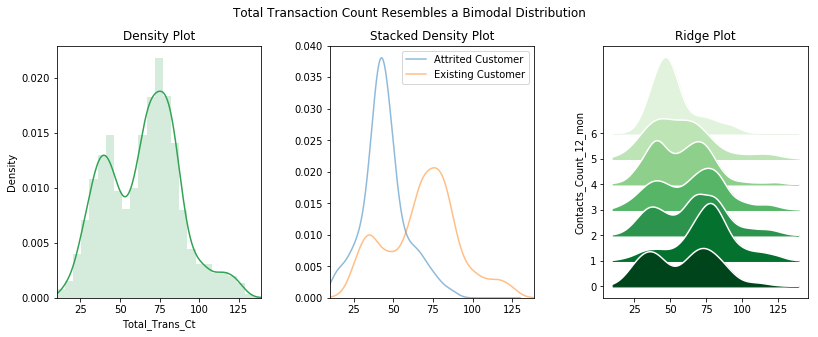

In [242]:
cmap=plt.get_cmap('tab20c')
fig, ax=plt.subplots(1, 3, figsize=(12, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
ax[0].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[0].set_ylim(bottom=0)
ax[0].set_title('Density Plot')
total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[1])
ax[1].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('')
ax[1].set_title('Stacked Density Plot')
ax[1].legend(['Attrited Customer', 'Existing Customer'])

cmap=plt.get_cmap('Greens')
sorted_df=df.sort_values('Contacts_Count_12_mon', ascending=False)
categories=sorted_df['Contacts_Count_12_mon'].unique()
c_increment=256/len(categories)
ticks=[]
ridge_gap=1/np.exp(zoom)
for idx, each_cat in enumerate(categories):
    values=sorted_df[sorted_df['Contacts_Count_12_mon']==each_cat]['Total_Trans_Ct'].values
    kde=gaussian_kde(values)
    x_axis=np.linspace(sorted_df['Total_Trans_Ct'].values.min(), sorted_df['Total_Trans_Ct'].values.max(), 100)
#         x_axis=np.arange(data[inner_col].values.min(), data[inner_col].values.max())
    y_upper=kde(x_axis)-ridge_gap*idx
    y_lower=-ridge_gap*idx
    ax[2].plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
    ax[2].fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
    ticks.append(each_cat)
tick_loc=[-ridge_gap*i for i in range(len(categories))]
ax[2].set_yticks(tick_loc)
ax[2].set_yticklabels(ticks)
ax[2].set_ylabel('Contacts_Count_12_mon')
ax[2].set_title('Ridge Plot')

fig.suptitle('Total Transaction Count Resembles a Bimodal Distribution')
fig.tight_layout(pad=3)
plt.show()


In [ ]:
from scipy.stats import gaussian_kde

# kde=gaussian_kde(df['Total_Trans_Ct'].values)
# x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
# plt.plot(x_axis, kde(x_axis))
fig, ax=plt.subplots(2, 1)
plt.subplots_adjust(hspace=-.8)
for idx, each_cat in enumerate(df['Attrition_Flag'].unique()):
    data=df[df['Attrition_Flag']==each_cat]
    kde=gaussian_kde(data['Months_Inactive_12_mon'].values)
    x_axis=np.arange(data['Months_Inactive_12_mon'].values.min(), data['Months_Inactive_12_mon'].values.max(), 0.1)
#     ax[idx].set_alpha(0)
    ax[idx].axis('off')
    ax[idx].plot(x_axis, kde(x_axis))
    ax[idx].fill_between(x_axis, kde(x_axis),color=cmap(3), alpha=0.5)
    ax[idx].spines['top'].set_visible(False)

In [39]:
def plot_ridge(data, outer_col, inner_col, zoom): 
    from scipy.stats import gaussian_kde
    cmap=plt.get_cmap('Greens')
    categories=data[outer_col].unique()
    c_increment=256/len(categories)
    ticks=[]
    ridge_gap=1/np.exp(zoom)
    for idx, each_cat in enumerate(categories):
        values=data[data[outer_col]==each_cat][inner_col].values
        kde=gaussian_kde(values)
        x_axis=np.linspace(data[inner_col].values.min(), data[inner_col].values.max(), 100)
#         x_axis=np.arange(data[inner_col].values.min(), data[inner_col].values.max())
        y_upper=kde(x_axis)-ridge_gap*idx
        y_lower=-ridge_gap*idx
        plt.plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
        plt.fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
        ticks.append(each_cat)
    tick_loc=[-ridge_gap*i for i in range(len(categories))]
    plt.yticks(tick_loc, ticks)
    plt.ylabel(outer_col)
    plt.xlabel(inner_col)
    

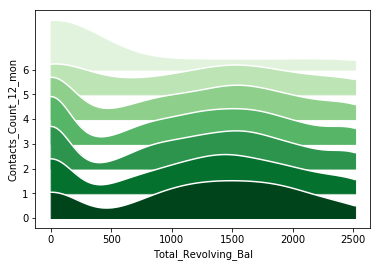

In [40]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 8)

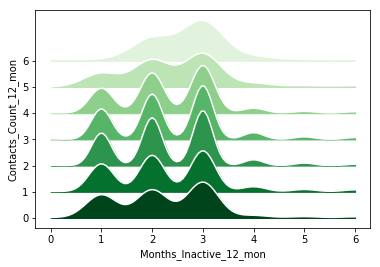

In [41]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 1)

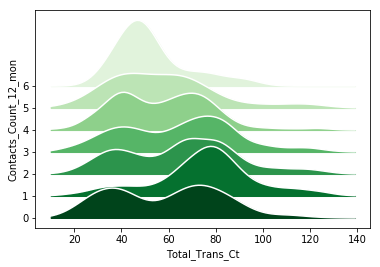

In [186]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Trans_Ct', 4.5)

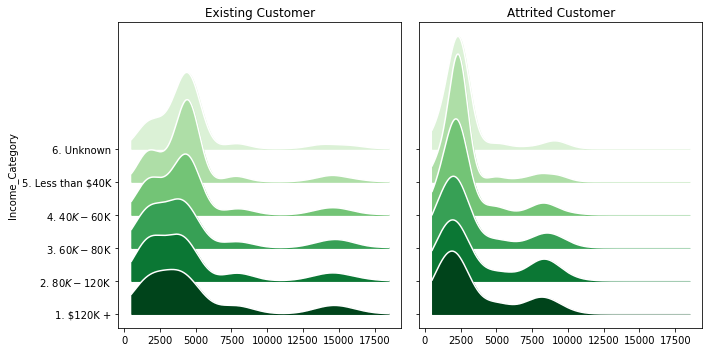

In [275]:
cmap=plt.get_cmap('Greens')

from scipy.stats import gaussian_kde
outer_col='Income_Category'
inner_col='Total_Trans_Amt'
classes='Attrition_Flag'
fig, ax=plt.subplots(1, len(df[classes].unique()), figsize=(10, 5), sharey=True, sharex=True)
zoom=9
sorted_df=df.sort_values(by=[outer_col, classes], ascending=False)
x_axis=np.arange(df[inner_col].values.min(), df[inner_col].values.max(), 10)
categories=sorted_df[outer_col].unique()
c_increment=256/len(categories)
for j, each_group in enumerate(sorted_df[classes].unique()): 
    data=sorted_df[sorted_df[classes]==each_group]
    ticks=[]
    ridge_gap=1/np.exp(zoom)
    for idx, each_cat in enumerate(categories):
        values=data[data[outer_col]==each_cat][inner_col].values
        if len(values)>1: 
            kde=gaussian_kde(values)
            y_upper=kde(x_axis)-ridge_gap*idx
            y_lower=-ridge_gap*idx
            ax[j].plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
            ax[j].fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
        ticks.append(each_cat)
    tick_loc=[-ridge_gap*i for i in range(len(categories))]
    ax[0].set_yticks(tick_loc)
    ax[0].set_yticklabels(ticks)
    ax[0].set_ylabel(outer_col)
#     ax[0].set_xlabel(inner_col)
    ax[j].set_title(each_group)
fig.tight_layout()


In [236]:
df['Total_Ct_Chng_Q4_Q1'].value_counts().sort_index()

0.000    7
0.028    1
0.029    1
0.038    1
0.053    1
        ..
3.000    2
3.250    1
3.500    1
3.571    1
3.714    1
Name: Total_Ct_Chng_Q4_Q1, Length: 830, dtype: int64

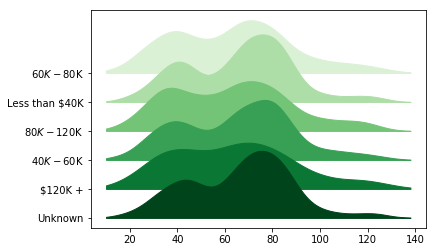

In [45]:
cmap=plt.get_cmap('Greens')
categories=df['Income_Category'].unique()
c_increment=256/len(categories)
ticks=[]
for idx, each_cat in enumerate(df['Income_Category'].unique()):
    data=df[df['Income_Category']==each_cat]
    kde=gaussian_kde(data['Total_Trans_Ct'].values)
    x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
#     plt.plot(x_axis, kde(x_axis)-.009*idx, color='white')
    plt.fill_between(x_axis, kde(x_axis)-.009*idx, -.009*idx, color=cmap(int((idx+1)*c_increment)), alpha=1)
    ticks.append(each_cat)
tick_loc=[-.009*i for i in range(len(categories))]
plt.yticks(tick_loc, ticks)
plt.show()

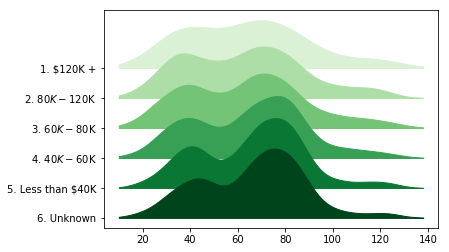

In [270]:
cmap=plt.get_cmap('Greens')
categories=df['Income_Category'].unique()
c_increment=256/len(categories)
ticks=[]
for idx, each_cat in enumerate(sorted(df['Income_Category'].unique())):
    data=df[df['Income_Category']==each_cat]
    if len(data['Total_Trans_Ct'].values)>1:
        kde=gaussian_kde(data['Total_Trans_Ct'].values)
        x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
#     plt.plot(x_axis, kde(x_axis)-.009*idx, color='white')
        plt.fill_between(x_axis, kde(x_axis)-.009*idx, -.009*idx, color=cmap(int((idx+1)*c_increment)), alpha=1)
    ticks.append(each_cat)
tick_loc=[-.009*i for i in range(len(categories))]
plt.yticks(tick_loc, ticks)
plt.show()

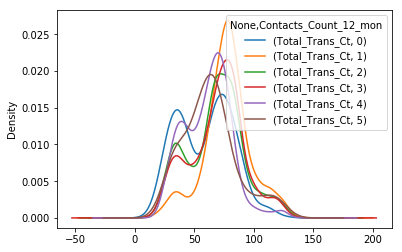

In [46]:
import seaborn as sns
df_attr=df[df['Attrition_Flag']=='Existing Customer']
df_attr[['Total_Trans_Ct', 'Contacts_Count_12_mon']].pivot(columns='Contacts_Count_12_mon').plot(kind='kde')

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


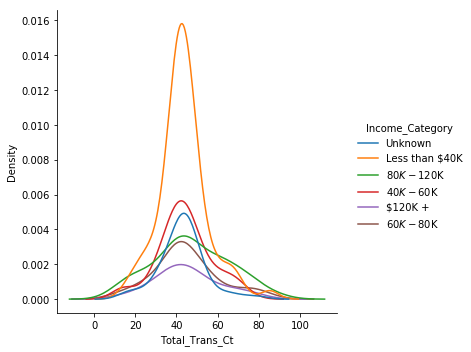

In [47]:
import seaborn as sns
sns.displot(total_rev_bal[total_rev_bal['Attrition_Flag']=='Attrited Customer'], x="Total_Trans_Ct", hue="Income_Category", kind="kde")

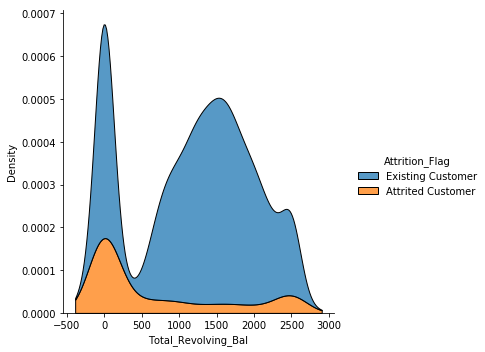

In [48]:
import seaborn as sns
# sns.displot(total_rev_bal[total_rev_bal['Attrition_Flag']=='Attrited Customer'], x="Total_Trans_Ct", hue="Income_Category", kind="kde", multiple='stack')
sns.displot(df, x="Total_Revolving_Bal", hue="Attrition_Flag", kind="kde", multiple='stack')





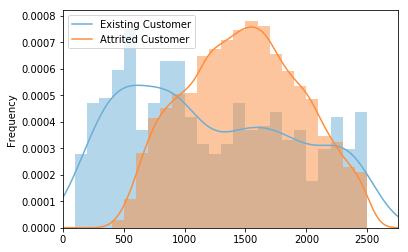

In [49]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
bins=np.arange(min_bal, max_bal, 100)
cmap = plt.get_cmap("tab20c")
colors=[cmap(1), cmap(5)]

for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
    g['Total_Revolving_Bal'].plot(kind='kde', label=i, alpha=1, color=colors[idx])
    g['Total_Revolving_Bal'].plot(kind='hist', density=True, alpha=0.5, label=i, color=colors[idx], bins=bins) 

plt.xlim([0, 2750])
plt.legend(['Existing Customer', 'Attrited Customer'], loc='upper left')

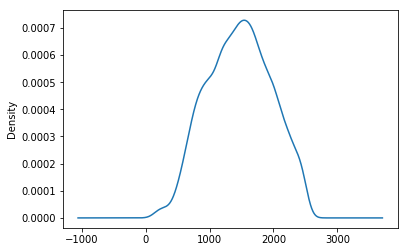

In [50]:
total_rev_bal['Total_Revolving_Bal'].plot(kind='kde')

# Box Plot

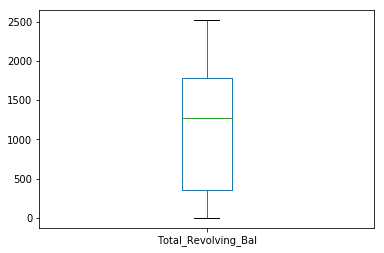

In [51]:
df['Total_Revolving_Bal'].plot(kind='box', showfliers=False)

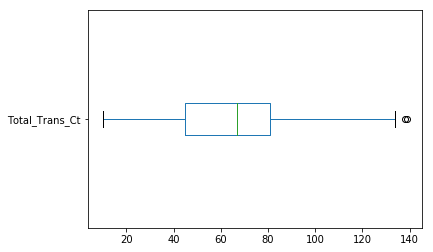

In [52]:
df['Total_Trans_Ct'].plot(kind='box', vert=False)

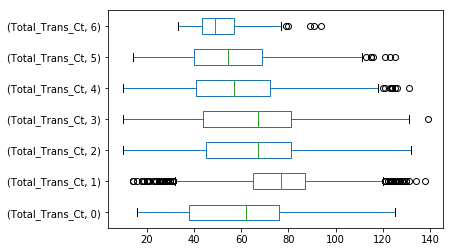

In [53]:
df[['Contacts_Count_12_mon', 'Total_Trans_Ct']].sort_values('Contacts_Count_12_mon').pivot(columns='Contacts_Count_12_mon').plot(kind='box', vert=False)

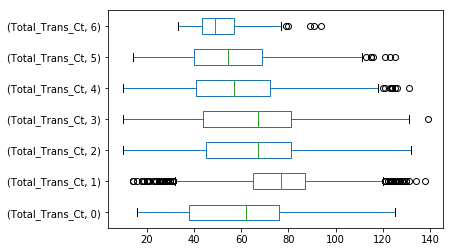

In [54]:
df[['Contacts_Count_12_mon', 'Total_Trans_Ct']].pivot(columns='Contacts_Count_12_mon').plot(kind='box', vert=False)

In [113]:
def rand_jitter(arr):
    stdev = .1 * (max(arr) - min(arr))
    print(stdev)
    return arr + np.random.randn(len(arr)) * 0.03# * stdev
#     return arr+np.randrange(-1, 1)

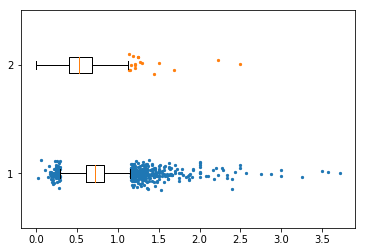

In [245]:
box_lists=[]
size=5
for idx, each_cat in enumerate(df['Attrition_Flag'].unique()): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Ct_Chng_Q4_Q1'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    plt.scatter(outlier_x, jitter, s=size)
plt.boxplot(box_lists, showfliers=False, vert=False)
plt.show()

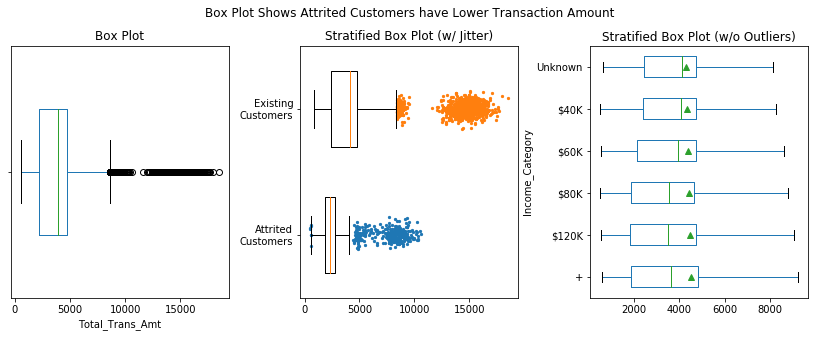

In [278]:
fig, ax=plt.subplots(1, 3, figsize=(12, 5))#, sharex=True)
df['Total_Trans_Amt'].plot(kind='box', vert=False, ax=ax[0], widths=.5)
ax[0].set_yticklabels('')
ax[0].set_xlabel('Total_Trans_Amt')
ax[0].set_title('Box Plot')

box_lists=[]
size=5
for idx, each_cat in enumerate(sorted(df['Attrition_Flag'].unique())): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Trans_Amt'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    ax[1].scatter(outlier_x, jitter, s=size)
ax[1].boxplot(box_lists, showfliers=False, vert=False, widths=.6)
ax[1].set_yticklabels(['Attrited\nCustomers', 'Existing\nCustomers'])
ax[1].set_title('Stratified Box Plot (w/ Jitter)')

df[['Income_Category', 'Total_Trans_Amt']].sort_values('Income_Category', ascending=False).pivot(columns='Income_Category').plot(kind='box', vert=False, ax=ax[2], showmeans=True, showfliers=False)
ax[2].set_ylabel('Income_Category')
ax[2].set_yticklabels([x.split()[-1] for x in sorted(df['Income_Category'].unique())])
# ax[2].set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax[2].set_title('Stratified Box Plot (w/o Outliers)')
fig.suptitle('Box Plot Shows Attrited Customers have Lower Transaction Amount')
fig.tight_layout(pad=3, w_pad=0)


In [258]:
df[['Income_Category', 'Total_Trans_Amt']].sort_values('Income_Category', ascending=False).pivot(columns='Income_Category').std()

                 Income_Category
Total_Trans_Amt  $120K +            3816.054540
                 $40K - $60K        3382.499980
                 $60K - $80K        3789.005119
                 $80K - $120K       3788.213644
                 Less than $40K     3097.398449
                 Unknown            2922.695013
dtype: float64

In [183]:
def plot_box_jitter_outliers(data, outer_col, inner_col): 
    box_lists=[]
    categories=data[outer_col].unique()
    for idx, each_cat in enumerate(categories): 
        value_list=data[data[outer_col]==each_cat][inner_col].values
        q3=np.quantile(value_list, 0.75)
        q1=np.quantile(value_list, 0.25)
        IQR=q3-q1
        outlier_x=[]
        outlier_y=[]
        for each_value in value_list: 
            if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
                outlier_x.append(each_value)
                outlier_y.append(idx+1)
        box_lists.append(value_list)
        jitter=outlier_y+np.random.randn(len(outlier_y))*.05
        plt.scatter(outlier_x, jitter, s=5)
    plt.boxplot(box_lists, showfliers=False, vert=False)
    plt.yticks(np.arange(1, len(categories)+1), categories)
    plt.xlabel(inner_col)
    plt.ylabel(outer_col)


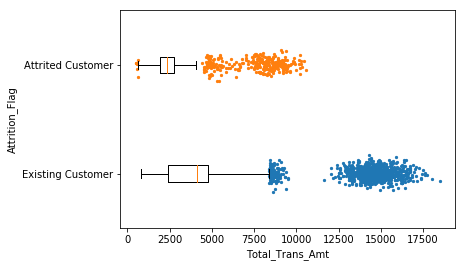

In [191]:
plot_box_jitter_outliers(df, 'Income_Category', 'Total_Trans_Amt')

In [185]:
df[['Total_Revolving_Bal', '']]

KeyError: "[''] not in index"

In [290]:
def random_jitter(arr): 
    stdev=.12*(max(arr)-min(arr))
    return arr+np.random.rand(len(arr))*stdev

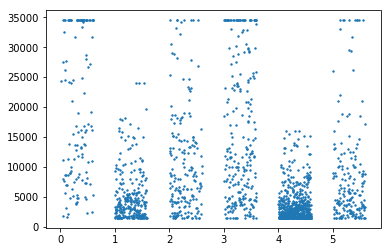

In [295]:
attrited_df=df[df['Attrition_Flag']=='Attrited Customer']#[['Income_Category', 'Credit_Limit']].plot(kind='scatter', x='Income_Category', y='Credit_Limit')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x_axis=lb.fit_transform(attrited_df['Income_Category'])

plt.scatter(random_jitter(x_axis), attrited_df['Credit_Limit'], s=2)

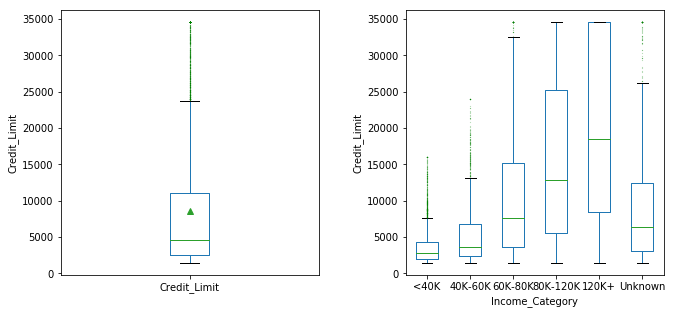

In [282]:
label_order=[
    ('Credit_Limit', 'Less than $40K'), 
    ('Credit_Limit', '$40K - $60K'), 
    ('Credit_Limit', '$60K - $80K'), 
    ('Credit_Limit', '$80K - $120K'), 
    ('Credit_Limit', '$120K +'), 
    ('Credit_Limit', 'Unknown')]

fig, ax=plt.subplots(1, 2, figsize=(10, 5))
flierprops={'markersize': .1, 'markerfacecolor': 'green', 'markeredgecolor': 'green'}

df['Credit_Limit'].plot(kind='box', showmeans=True, flierprops=flierprops, ax=ax[0])
df[['Income_Category', 'Credit_Limit']].pivot(columns=['Income_Category']).reindex(label_order, axis=1).plot(kind='box', flierprops=flierprops, ax=ax[1])
# ax[1].set_xticks([1, 2, 3, 4, 5, 6], ['Less than $40K', '40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
plt.xticks([1, 2, 3, 4, 5, 6], ['<40K', '40K-60K', '60K-80K', '80K-120K', '120K+', 'Unknown'])
ax[0].scatter()
ax[1].set_xlabel('Income_Category')
ax[0].set_ylabel('Credit_Limit')
ax[1].set_ylabel('Credit_Limit')
# fig.suptitle('')
fig.tight_layout(pad=3)
plt.show()

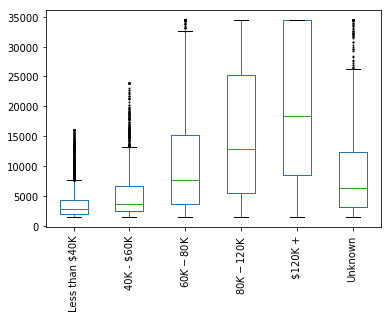

In [233]:
label_order=[
    ('Credit_Limit', 'Less than $40K'), 
    ('Credit_Limit', '$40K - $60K'), 
    ('Credit_Limit', '$60K - $80K'), 
    ('Credit_Limit', '$80K - $120K'), 
    ('Credit_Limit', '$120K +'), 
    ('Credit_Limit', 'Unknown')]

df[['Income_Category', 'Credit_Limit']].pivot(columns=['Income_Category']).reindex(label_order, axis=1).plot(kind='box', rot=90, flierprops={'markersize': 1})
plt.xticks([1, 2, 3, 4, 5, 6], ['Less than $40K', '40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
plt.show()

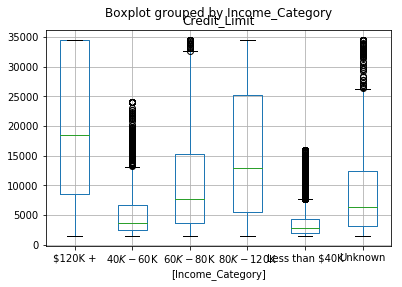

In [195]:
df[['Income_Category', 'Credit_Limit']].boxplot(by='Income_Category')

In [182]:
total_rev_bal.kde(column='Total_Revolving_Bal', by='Attrition_Flag', alpha=0.5)

AttributeError: 'DataFrame' object has no attribute 'kde'

In [173]:
total_rev_bal[(total_rev_bal['Attrition_Flag']=='Attrited Customer')&(total_rev_bal['Total_Revolving_Bal']==2517)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
168,713741358,Attrited Customer,46,M,5,Graduate,Single,$80K - $120K,Blue,33,...,3,3,32975.0,2517,30458.0,0.658,597,17,0.700,0.076
240,710299608,Attrited Customer,53,F,2,Unknown,Married,Less than $40K,Blue,33,...,3,3,2859.0,2517,342.0,0.993,817,30,0.667,0.880
337,709278258,Attrited Customer,54,M,2,Unknown,Married,$40K - $60K,Blue,44,...,3,2,2902.0,2517,385.0,0.821,996,26,0.444,0.867
467,714272658,Attrited Customer,43,F,2,Uneducated,Single,Less than $40K,Blue,24,...,3,2,2962.0,2517,445.0,1.046,929,31,0.409,0.850
568,711242058,Attrited Customer,48,M,4,Unknown,Single,$80K - $120K,Blue,36,...,3,1,11862.0,2517,9345.0,0.766,643,16,0.231,0.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,715154058,Attrited Customer,49,F,0,Unknown,Married,Less than $40K,Blue,39,...,3,3,4982.0,2517,2465.0,0.903,9274,65,0.857,0.505
10051,770038983,Attrited Customer,37,M,4,High School,Single,$60K - $80K,Silver,31,...,3,3,28831.0,2517,26314.0,0.770,8688,69,0.769,0.087
10071,713281833,Attrited Customer,37,M,3,Unknown,Single,$40K - $60K,Blue,29,...,2,3,13589.0,2517,11072.0,0.941,9456,79,1.026,0.185
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,...,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189


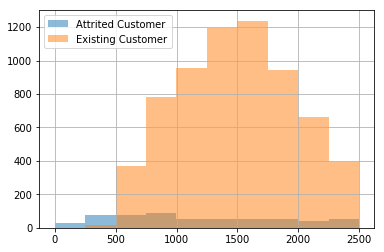

In [112]:
bins=np.arange(0, 2500, 250)
for i, g in df[df['Total_Revolving_Bal']>0].groupby('Attrition_Flag'): 
    g['Total_Revolving_Bal'].hist(alpha=0.5, label=i, bins=bins) 
#     g.hist(alpha=.7)
plt.legend()

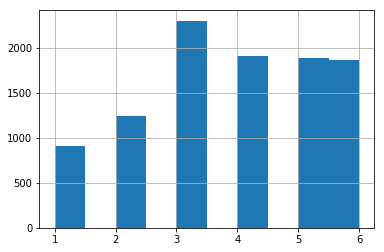

In [46]:
df['Total_Relationship_Count'].hist(bins=10)